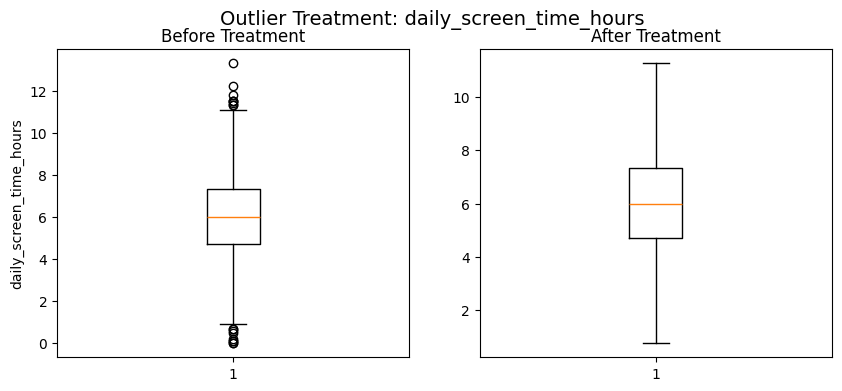

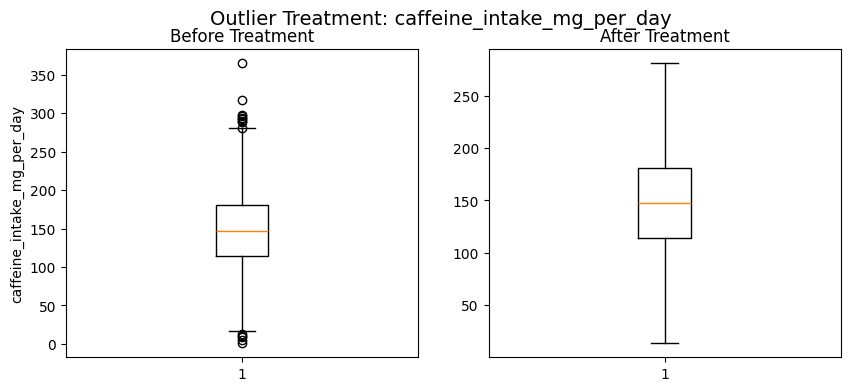

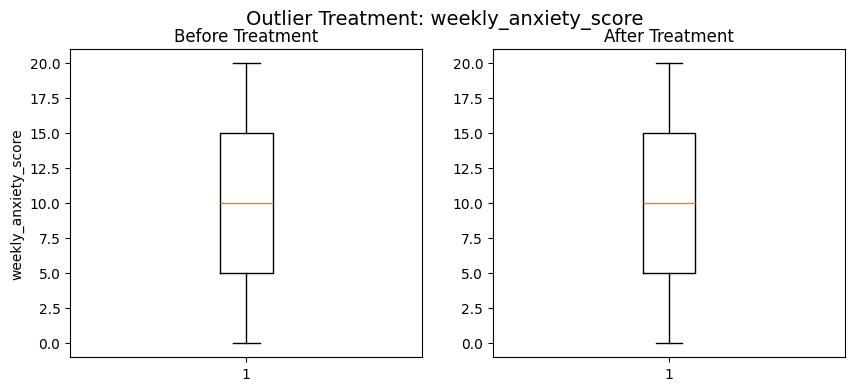

Outliers detected per column:
{'age': 0, 'daily_screen_time_hours': 18, 'phone_usage_hours': 6, 'laptop_usage_hours': 7, 'tablet_usage_hours': 4, 'tv_usage_hours': 6, 'social_media_hours': 9, 'work_related_hours': 5, 'entertainment_hours': 5, 'gaming_hours': 9, 'sleep_duration_hours': 11, 'sleep_quality': 0, 'mood_rating': 0, 'stress_level': 0, 'physical_activity_hours_per_week': 6, 'mental_health_score': 0, 'uses_wellness_apps': 0, 'eats_healthy': 0, 'caffeine_intake_mg_per_day': 14, 'weekly_anxiety_score': 0, 'weekly_depression_score': 0, 'mindfulness_minutes_per_day': 6, 'gender_Male': 0, 'gender_Other': 183, 'location_type_Suburban': 0, 'location_type_Urban': 0}

Before Treatment:
                age  daily_screen_time_hours  phone_usage_hours  \
count  2000.000000              2000.000000        2000.000000   
mean     38.805500                 6.025600           3.023700   
std      14.929203                 1.974123           1.449399   
min      13.000000                 0.0000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

df = pd.read_csv('processed_encoding.csv')
df.head(),df.shape,df.describe()

numeric_cols = df.select_dtypes(include=[np.number]).columns

def treat_outliers_iqr(data, cols):
    df_clean = data.copy()
    outlier_summary = {}

    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        outlier_summary[col] = int(outliers)


        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound,
                          np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col]))

        if col in ["daily_screen_time_hours", "caffeine_intake_mg_per_day", "weekly_anxiety_score"]:
            fig, axes = plt.subplots(1, 2, figsize=(10, 4))
            fig.suptitle(f"Outlier Treatment: {col}", fontsize=14)

            axes[0].boxplot(data[col], vert=True)
            axes[0].set_title("Before Treatment")
            axes[0].set_ylabel(col)

            axes[1].boxplot(df_clean[col], vert=True)
            axes[1].set_title("After Treatment")

            plt.show()


    return df_clean, outlier_summary

df_clean, outlier_summary = treat_outliers_iqr(df, numeric_cols)

print("Outliers detected per column:")
print(outlier_summary)

print("\nBefore Treatment:\n", df[numeric_cols].describe())
print("\nAfter Treatment:\n", df_clean[numeric_cols].describe())

df_clean.to_csv("processed_clean.csv", index=False)
files.download("processed_clean.csv")